In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

from PIL import Image, ImageDraw, ImageFont, ImageColor
from random import randint

In [3]:
path = Path('/home/nbuser/Packaging')

In [4]:
path = Path(".")
classes = ['125', '250', '500', 'background']

data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=250).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.model.eval()
learn.load('resnet34-fonts')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]
Path: .
x: ImageItemList (1 items)
[]
Path: .;
Valid: LabelList
y: CategoryList (1 items)
[]
Path: .
x: ImageItemList (1 items)
[]
Path: .;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


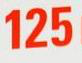

In [5]:
test_image = path/'tests'/'125-2.jpg'
img = open_image(test_image)
img

In [6]:
(class_name, nr_of_classes, losses) = learn.predict(img)
print(class_name)
print(losses)

125
tensor([0.5703, 0.0100, 0.0004, 0.4194])


'125'

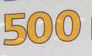

In [7]:
test_image = path/'tests'/'500-3.jpeg'
img = open_image(test_image)
img

In [9]:
(class_name, nr_of_classes, losses) = learn.predict(img)
print(class_name)
print(losses)

500
tensor([0.0001, 0.0143, 0.8184, 0.1672])


,file_name,class_name
0,125_0.png,125
1,125_1.png,125
2,125_3.png,125
3,125_4.png,125
4,125_5.png,125


In [25]:
test_image = path/'tests'/'500.jpeg'
img = open_image(test_image)
img.shape

torch.Size([3, 347, 550])

In [27]:
bbox_size = (100,100)
test_image = path/'tests'/'500.jpeg'

x = 450
y = 100
w = 100
h = 60

results = []

step = 40
for sy in range(0,int(200/step)):
    for sx in range(0,int(450/step)):
        x = sx * step
        y = sy * step
        crop_rectangle = (x, y, x+w, y+h)
        im = Image.open(test_image)
        cropped_im = im.crop(crop_rectangle)
        temp_path = str(path) + '/tests/tmp_'+str(s)+'.jpeg'
        cropped_im.save(temp_path)
        img = open_image(temp_path)
        (class_name, nr_of_classes, losses) = learn.predict(img)
        results.append((class_name, losses[nr_of_classes]))

results

# cropped_im

# print(class_name)
# print(losses)

[('background', tensor(0.9994)),
 ('background', tensor(0.9972)),
 ('background', tensor(0.9956)),
 ('background', tensor(0.9983)),
 ('background', tensor(0.9903)),
 ('background', tensor(0.9669)),
 ('background', tensor(0.9911)),
 ('background', tensor(0.9783)),
 ('background', tensor(0.9533)),
 ('background', tensor(0.9616)),
 ('background', tensor(0.9490)),
 ('background', tensor(0.9971)),
 ('background', tensor(0.9605)),
 ('background', tensor(0.9728)),
 ('background', tensor(0.9144)),
 ('background', tensor(0.4460)),
 ('background', tensor(0.7725)),
 ('background', tensor(0.8811)),
 ('background', tensor(0.6941)),
 ('background', tensor(0.7802)),
 ('background', tensor(0.6891)),
 ('background', tensor(0.9863)),
 ('background', tensor(0.9873)),
 ('background', tensor(0.9891)),
 ('background', tensor(0.6589)),
 ('background', tensor(0.9148)),
 ('background', tensor(0.6453)),
 ('background', tensor(0.6871)),
 ('background', tensor(0.6351)),
 ('background', tensor(0.5782)),
 ('backgro